In [3]:
!pip install finance_datareader


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

In [8]:
# 동적으로 구성
s1_ticker = '304100'
s2_ticker = '005380'
s1 = fdr.DataReader(s1_ticker, '2020').resample(rule = 'MS').mean().astype(int)[['Close']]
s2 = fdr.DataReader(s2_ticker, '2020').resample(rule = 'MS').mean().astype(int)[['Close']]
s1.head()

,Close
Date,
2020-07-01,14899
2020-08-01,15315
2020-09-01,16373
2020-10-01,17692
2020-11-01,17618


## 단순수익률

수익률 = (나중가격 - 이전가격) / 이전가격

In [13]:
s1[s1_ticker] = s1['Close'].pct_change() # 수익률
s2[s2_ticker] = s2['Close'] / s2['Close'].shift(1) - 1

In [14]:
s1.head()

,Close,304100
Date,,
2020-07-01,14899,NaN
2020-08-01,15315,0.027921
2020-09-01,16373,0.069083
2020-10-01,17692,0.080559
2020-11-01,17618,-0.004183


In [15]:
s2.head()

,Close,005380
Date,,
2020-01-01,119625,NaN
2020-02-01,128025,0.070219
2020-03-01,90854,-0.290342
2020-04-01,93315,0.027087
2020-05-01,94852,0.016471


In [17]:
changes = pd.concat([s1[s1_ticker], s2[s2_ticker]], axis = 1).dropna()
changes.head()

,304100,005380
Date,,
2020-08-01,0.027921,0.425584
2020-09-01,0.069083,0.106298
2020-10-01,0.080559,-0.013544
2020-11-01,-0.004183,0.017017
2020-12-01,-0.029118,0.071163


In [18]:
print(s1[s1_ticker].mean())
print(s1[s1_ticker].std())

0.030173660710744236
0.1956289063432216


In [19]:
print(s2[s2_ticker].mean())
print(s2[s2_ticker].std())

0.01532983548836499
0.10968269313862809


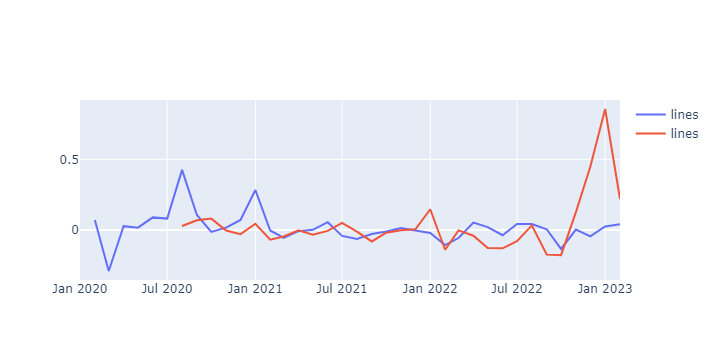

In [23]:
# Create traces : plotly.com 찾아서 할 수 있도록 하라.
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=s2.index, y=s2[s2_ticker],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=s1.index, y=s1[s1_ticker],
                    mode='lines',
                    name='lines'))
fig.show()

## 복리수익률

자기자신에 수익률을 계속 누적해서 구한 것.

In [24]:
changes.head()

,304100,005380
Date,,
2020-08-01,0.027921,0.425584
2020-09-01,0.069083,0.106298
2020-10-01,0.080559,-0.013544
2020-11-01,-0.004183,0.017017
2020-12-01,-0.029118,0.071163


In [59]:
누적수익률 = (changes + 1).cumprod() - 1     # cumprod = 누적곱
누적수익률.tail()

,304100,005380
Date,,
2022-10-01,-0.555272,0.504147
2022-11-01,-0.498825,0.508481
2022-12-01,-0.274448,0.440433
2023-01-01,0.347205,0.477081
2023-02-01,0.642862,0.537454


In [61]:
누적수익률.index.min()
누적수익률.index.max()

Timestamp('2023-02-01 00:00:00', freq='MS')

In [62]:
len(누적수익률.index) / 12

2.5833333333333335

## CAGR

0 ------------ 5 중에 <br>
               100 만들려면 수익률이 몇 %씩 되어야하는가? <br>
복리기 때문에 12%씩 5년을 받으면 단기 수익률 5년에 100%와 같다<br>

In [64]:
CAGR = (1+ 누적수익률) ** ((1/len(누적수익률.index) / 12) -1)
CAGR.tail()

,304100,005380
Date,,
2022-10-01,2.243674,0.665559
2022-11-01,1.991611,0.663651
2022-12-01,1.377073,0.694917
2023-01-01,0.742873,0.677721
2023-02-01,0.609507,0.651178


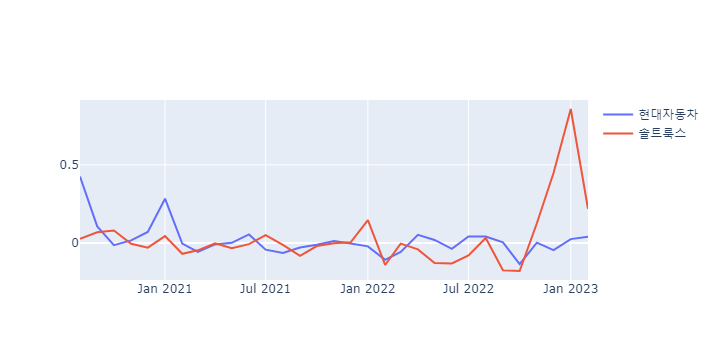

In [33]:
# Create traces : plotly.com 찾아서 할 수 있도록 하라.
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=changes.index, y=changes[s2_ticker], # x 값에는 날짜, y 값에는 수익률
                    mode='lines',
                    name='현대자동차'))
fig.add_trace(go.Scatter(x=changes.index, y=changes[s1_ticker],
                    mode='lines',
                    name='솔트룩스'))
fig.show()

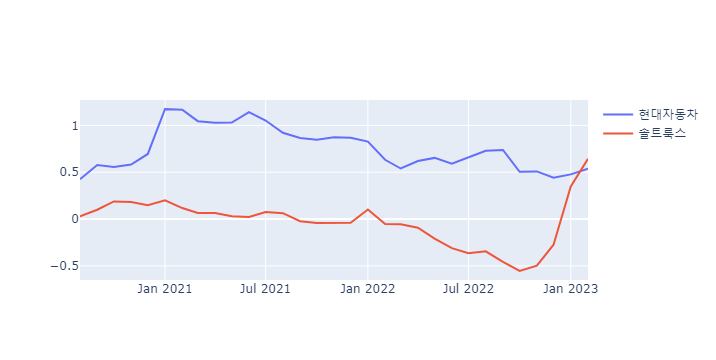

In [35]:
# Create traces : plotly.com 찾아서 할 수 있도록 하라.
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=CAGR.index, y=CAGR[s2_ticker], # x 값에는 날짜, y 값에는 누적수익률
                    mode='lines',
                    name='현대자동차'))
fig.add_trace(go.Scatter(x=CAGR.index, y=CAGR[s1_ticker],
                    mode='lines',
                    name='솔트룩스'))
fig.show()

## 로그수익률

예시 : 100 -> 150 -> 100 <br>
      50% 수익, 33 % 손해 = 17% 이익? 그런데 100? <br>
    그렇기 때문에 단순수익률말고도 다른 수익률 지표가 필요하다.<br>
    그래서 나온것이 로그 수익률

In [37]:
s1.head()

,Close,304100
Date,,
2020-07-01,14899,NaN
2020-08-01,15315,0.027921
2020-09-01,16373,0.069083
2020-10-01,17692,0.080559
2020-11-01,17618,-0.004183


In [100]:
s1['LogReturn'] = np.log(s1['Close']) - np.log(s1['Close']).shift(1)
s2['LogReturn'] = np.log(s2['Close']) - np.log(s2['Close']).shift(1)
s1.head()

,Close,304100,LogReturn,Cum_LogReturn,Return
Date,,,,,
2020-07-01,14899,NaN,NaN,NaN,NaN
2020-08-01,15315,0.027921,0.027539,0.027539,0.027921
2020-09-01,16373,0.069083,0.066801,0.094340,0.098933
2020-10-01,17692,0.080559,0.077479,0.171818,0.187462
2020-11-01,17618,-0.004183,-0.004191,0.167627,0.182495


In [101]:
s1['Cum_LogReturn'] = s1['LogReturn'].cumsum()  # cumsum = 누적합계
s2['Cum_LogReturn'] = s1['LogReturn'].cumsum()  # Cum_LogReturn = 누적로그수익률
s1['Return'] = (1+ s1[s1_ticker]).cumprod() - 1
s2['Return'] = (1+ s2[s2_ticker]).cumprod() - 1
s1.tail()

,Close,304100,LogReturn,Cum_LogReturn,Return
Date,,,,,
2022-10-01,6626,-0.178425,-0.196532,-0.810293,-0.555272
2022-11-01,7467,0.126924,0.119492,-0.690801,-0.498825
2022-12-01,10810,0.447703,0.369978,-0.320822,-0.274448
2023-01-01,20072,0.856799,0.618854,0.298032,0.347205
2023-02-01,24477,0.219460,0.198408,0.496440,0.642862


### 실습

In [85]:
#0. 기본데이터셋
samsung = fdr.DataReader('005930', '1998').resample(rule = 'MS').mean().astype(int)[['Close']]
samsung_ticker = '304100'

In [86]:
samsung

,Close
Date,
1998-11-01,1243
1998-12-01,1418
1999-01-01,1740
1999-02-01,1680
1999-03-01,1759
...,...
2022-10-01,56710
2022-11-01,61090
2022-12-01,59080


In [80]:
# 수익률
# 누적수익률  ★
# 연복리수익률(CAGR) : 찾아서 쓰는 정도
# 로그 수익률  ★
# 누적 로그 수익률 

In [95]:
# 선생님 답안
samsung['수익률'] = samsung['Close'].pct_change()
samsung['누적수익률'] = (1 + samsung['수익률']).cumprod() - 1
samsung['CAGR'] = (1+ 누적수익률) ** ((1/len(누적수익률.index) / 12) -1)
samsung['LogReturn'] = np.log(samsung['Close']) - np.log(samsung['Close']).shift(1)
samsung['Cum_LogReturn'] = samsung['LogReturn'].cumsum()
samsung.tail()

,Close,수익률,누적수익률,CAGR,LogReturn,Cum_LogReturn
Date,,,,,,
2022-10-01,56710,0.020056,44.623492,2.243674,0.019857,3.820423
2022-11-01,61090,0.077235,48.147224,1.991611,0.074398,3.894820
2022-12-01,59080,-0.032902,46.530169,1.377073,-0.033456,3.861365
2023-01-01,60540,0.024712,47.704747,0.742873,0.024412,3.885776
2023-02-01,62688,0.035481,49.432824,0.609507,0.034866,3.920642


In [51]:
samsung

,Close
Date,
1998-11-01,1243
1998-12-01,1418
1999-01-01,1740
1999-02-01,1680
1999-03-01,1759
...,...
2022-10-01,56710
2022-11-01,61090
2022-12-01,59080


In [79]:
# 단순수익률
samsung[samsung_ticker] = samsung['Close'].pct_change()
samsung

,Close,LogReturn,Cum_LogReturn,304100
Date,,,,
1998-11-01,1243,NaN,NaN,NaN
1998-12-01,1418,0.131720,0.131720,0.140788
1999-01-01,1740,0.204638,0.336357,0.227080
1999-02-01,1680,-0.035091,0.301266,-0.034483
1999-03-01,1759,0.045952,0.347218,0.047024
...,...,...,...,...
2022-10-01,56710,0.019857,3.820423,0.020056
2022-11-01,61090,0.074398,3.894820,0.077235
2022-12-01,59080,-0.033456,3.861365,-0.032902


In [68]:
changes = s1[[s1_ticker]].dropna()
changes.head()

,304100
Date,
2020-08-01,0.027921
2020-09-01,0.069083
2020-10-01,0.080559
2020-11-01,-0.004183
2020-12-01,-0.029118


In [71]:
# 누적수익률, CAGR
누적수익률 = (changes + 1).cumprod() - 1     # cumprod = 누적곱
누적수익률.tail()

,304100
Date,
2022-10-01,-0.555272
2022-11-01,-0.498825
2022-12-01,-0.274448
2023-01-01,0.347205
2023-02-01,0.642862


In [72]:
CAGR = (1+ 누적수익률) ** ((1/len(누적수익률.index) / 12) -1)
CAGR.tail()

,304100
Date,
2022-10-01,2.243674
2022-11-01,1.991611
2022-12-01,1.377073
2023-01-01,0.742873
2023-02-01,0.609507


In [74]:
# 로그수익률
samsung['LogReturn'] = np.log(samsung['Close']) - np.log(samsung['Close']).shift(1)

In [77]:
# 누적 로그수익률
samsung['Cum_LogReturn'] = samsung['LogReturn'].cumsum()
samsung



,Close,LogReturn,Cum_LogReturn
Date,,,
1998-11-01,1243,NaN,NaN
1998-12-01,1418,0.131720,0.131720
1999-01-01,1740,0.204638,0.336357
1999-02-01,1680,-0.035091,0.301266
1999-03-01,1759,0.045952,0.347218
...,...,...,...
2022-10-01,56710,0.019857,3.820423
2022-11-01,61090,0.074398,3.894820
2022-12-01,59080,-0.033456,3.861365


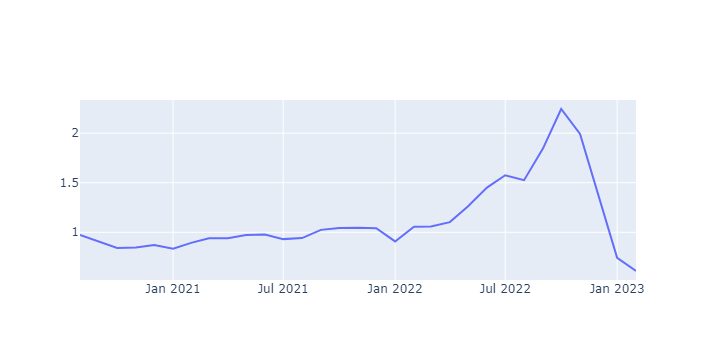

In [78]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=CAGR.index, y=CAGR[s1_ticker],
                    mode='lines',
                    name='삼성전자'))
fig.show()